<div align="center">
    <h1> <b>DEPARTAMENTO DE VENTAS</b></h1>
    <h1> <b>PROYECTO DE PRONÓSTICO DE VENTAS FUTURAS</b></h1><br>
</div>
<div>
    <h3> <b>Algoritmos: Series temporales.</b></h3>
</div>

# 1. ENUNCIADO DEL PROBLEMA Y CASO PRÁCTICO.


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1l7bHyrjzq839zVZE06cfdDksLabCN2hg"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Prediccion de Ventas Futuras usando Series Temporales
  </td></tr>
</table>


## 1.1 Entendimiento del Negocio y Objetivo del Proyecto.

![alt text](https://drive.google.com/uc?id=179967pYtO8DZkFIiqkzKeDXpzKF13KE9)

![alt text](https://drive.google.com/uc?id=1MHVbje9FNlAbo-LOMlCvSYfpgzW7PQ4y)

## 1.2 Características del Cliente.

![alt text](https://drive.google.com/uc?id=1DC-hoQNAxfDXEn91_BTF2B8qH904N8yq)

![alt text](https://drive.google.com/uc?id=1sM7eT88kpVmNMl7wJy0Jq0X_w-r783JF)

![alt text](https://drive.google.com/uc?id=1E6qCyK6SjFany6QsXw8lUc77CSOgjTkj)

# 2. IMPORTAR LAS LIBRERÍAS Y LOS DATASETS.

## 2.1 Importe de librerías.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

## 2.2 Cargar y Leer el Dataset.

In [2]:
# Leer el dataset
ventas = pd.read_csv('train.csv')
pd.set_option('display.max_columns',100) # lo mismo para las filas con max_rows
ventas

C:\Users\Danko\AppData\Local\Temp\ipykernel_13156\3020103493.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ventas = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


## 2.3 Leyenda.

In [3]:
ventas.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

#### Casi un millón de observaciones
#### 1115 tiendas únicas 
#### Notemos que las ventas es la variable objetivo (la que intentamos predecir)

#### Id:  ID de transacción (combinación de la tienda y la fecha)
#### Store: identificador único de la tienda
#### Sales: ventas diarias, esta es la variable objetivo
#### Customers: número de clientes de un día dado
#### Open: Booleano para indicar si la tienda estaba abierta o cerrada (0 = cerrada, 1 = abierta)
#### Promo: describe si la tienda tenía algún tipo de promoción ese día o no
#### StateHoliday: indica si el día era festivo o no (a = vacaciones públicas, b = vacaciones de Pascua holiday, c = Navidades, 0 = No era festivo)
#### SchoolHoliday: indica si (Store, Date) se ve afectado por el cierre de las escuelas públicas
#### Fuente original de los datos: https://www.kaggle.com/c/rossmann-store-sales/data

## 2.4 Primeras descripciones y conclusiones.

In [4]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Tenemos 9 variables, dos objetos: Date y StateHoliday y siete enteros.

In [5]:
ventas.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Conclusiones:
##### 1.- Cantidad de ventas promedio por día = 5773 Euros
##### 2.- Ventas mínimas por día = 0, ventas máximas por día = 41551
##### 3.- Promedio de clientes = 633, número mínimo de clientes = 0, número máximo de clientes = 7388

## 2.5 Cargar segundo dataset y Leer el Dataset.

In [6]:
# Leer el dataset
tiendas = pd.read_csv("store.csv")
tiendas

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## 2.6 Leyenda.

In [7]:
tiendas.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

##### StoreType: categoría que indica el tipo de tienda (a, b, c, d)
##### Assortment:  a = básico, b = extra, c = extedido
##### CompetitionDistance (en metros): distancia a la tienda de la competencia más cercana
##### CompetitionOpenSince [Mes/Año]:  fecha en que abrió la competencia
##### Promo2: Promo2 es una promoción continuada y consecutiva en algunas tiendas (0 = la tienda no participa, 1 = la tienda participa)
##### Promo2Since [Año/Semana]: fecha en la que la tienda empieza a participar en la Promo2
##### PromoInterval: describe los intervalos consecutivos donde la Promo2 empieza, indicando los meses en los que empieza la misma. P.e. "Feb,May,Aug,Nov" significa que cada nueva ronda de promoción empieza en Febrero, Mayo, Agosto, Noviembre de cualquier año de esa tienda


## 2.7 Primeras descripciones y conclusiones.

In [8]:
tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### 10 columnas en total, 5 flotantes, 2 enteros y 3 objetos.

In [9]:
tiendas.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Conclusiones:
##### 1.- Distancia promedio de la competencia: 5404 metros, competencia a menor distancia: 20 metros, competencia a mayor distancia: 75860 metros. 
##### 2.- En promedio, las competencias abren en julio, y la mayoría lo hace entre abril y mediados de octubre.
##### 3.- En promedio, las tiendas fueron abiertas en 2008 y la mayoría lo hizo entre medidados de 2002 y finales de 2014. Una tienda abrió en 1900.
##### 4.- En promedio, la mitad de las tiendas tienen promo2.
##### 5.- En promedio, las tiendas comenzaron a tener la promo 2 en el año 2011, pero la mayoría la obtuvo entre 2010 y 2013.

# 3. VISUALIZACIÓN DE LOS DATASET.

## 3.1 Explorar data set de ventas.

### 3.1.1 Hallar nulos.

In [10]:
# Veamos si nos faltan datos (cantidad de datos nulos)
# Se puede revisar y contar cuántos son usando la función .isna y también se puede ordenar en forma
# ascendente.
ventas.isna().sum().sort_values(ascending = False)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### 3.1.2 Observar histogramas.

array([[<AxesSubplot: title={'center': 'Store'}>,
        <AxesSubplot: title={'center': 'DayOfWeek'}>,
        <AxesSubplot: title={'center': 'Sales'}>],
       [<AxesSubplot: title={'center': 'Customers'}>,
        <AxesSubplot: title={'center': 'Open'}>,
        <AxesSubplot: title={'center': 'Promo'}>],
       [<AxesSubplot: title={'center': 'SchoolHoliday'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

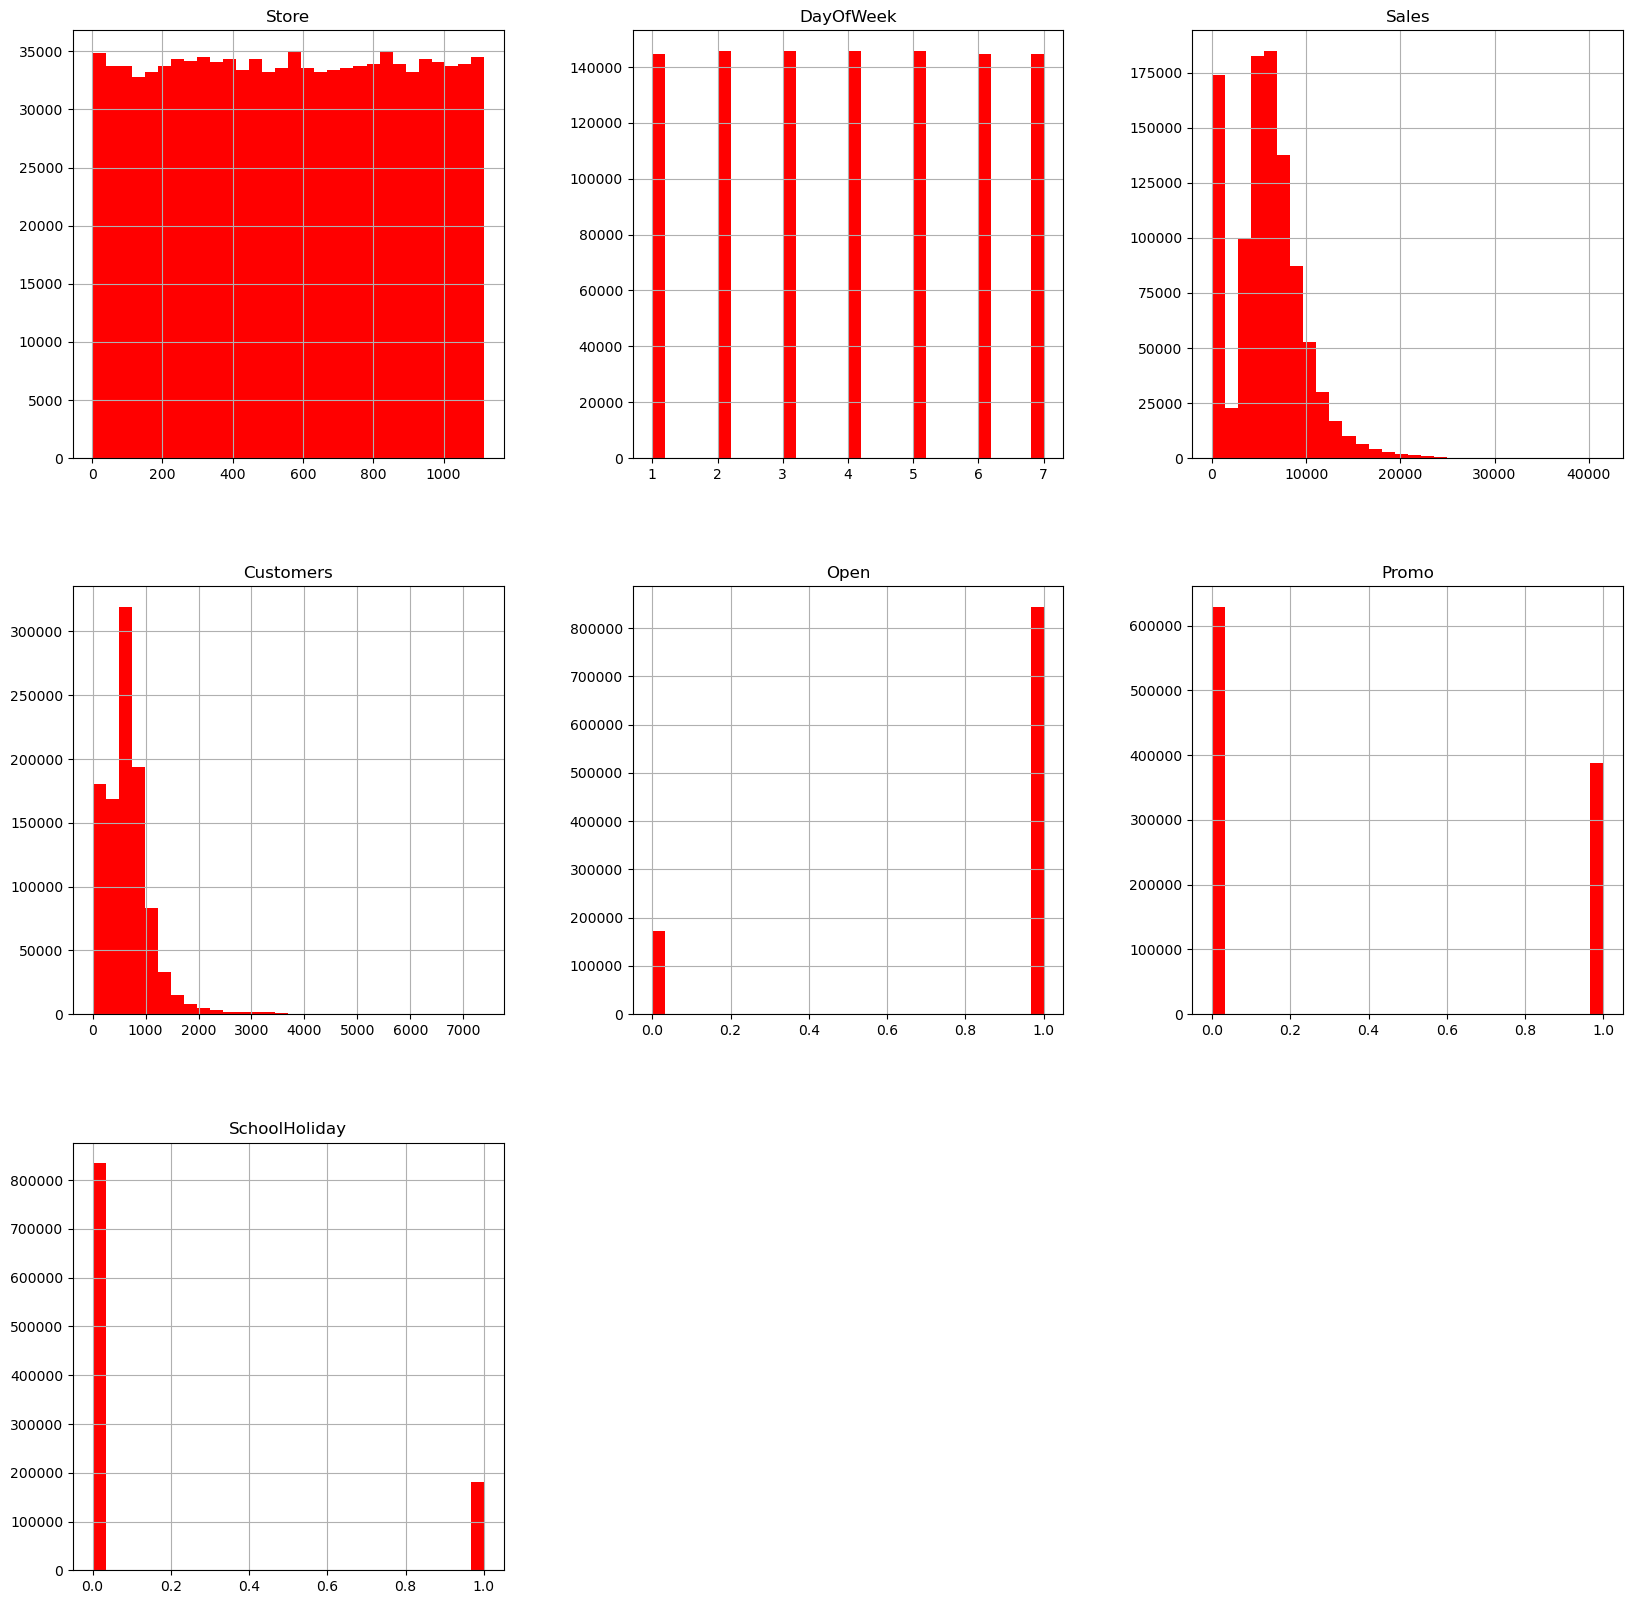

In [11]:
# Observaremos los histogramas de cada variable para decidir si eliminar alguna de ellas...
ventas.hist(bins = 30, figsize = (20, 20), color ='r')

### Conclusiones.
##### 1.- Los datos se distribuyen por igual en varios días de la semana.
##### 2.- La mayoría de las ventas se encuentran entre los 3000 y 12000 Euros.
##### 3.- Promedio de 600 clientes por día, la mayoría entre 0 y 4500.
##### 4.- Las tiendas están abiertas aproximadamente el 80% del tiempo.
##### 5.- La promoción # 1 se ejecutó aproximadamente el 40% del tiempo.
##### 6.- Los datos se distribuyen por igual entre todas las tiendas (sin sesgo)
##### 7.- Las vacaciones escolares duran alrededor del 18% del tiempo.

### 3.1.3 Separar la variable OPEN.

In [12]:
# Contamos el número de tiendas abiertas y cerradas.
open_df = ventas[ventas['Open'] == 1]
close_df = ventas[ventas['Open'] == 0]
print("La cantidad de informes que se han recolectado entre todas las tiendas son {}, "
      "la cantidad de informes generados los días que han abierto las tiendas son {} "
      "y la cantidad de informes generados los días que las tiendas han cerrado son {}.".format(len(ventas),len(open_df),len(close_df)))

print("Por lo tanto, un {:.1f}% de los informes entregan información de cuando la tienda permanecía "
      "cerrada.".format(len(close_df)*100/len(ventas)))# Número de cierre / número total

La cantidad de informes que se han recolectado entre todas las tiendas son 1017209, la cantidad de informes generados los días que han abierto las tiendas son 844392 y la cantidad de informes generados los días que las tiendas han cerrado son 172817.
Por lo tanto, un 17.0% de los informes entregan información de cuando la tienda permanecía cerrada.


In [13]:
# Nos quedaremos solo con un dataset de informes de los días que las tiendas estuvieron abiertas.
ventas = ventas[ventas['Open'] == 1]
ventas

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [14]:
# Eliminar columna open, ya que ahora no tiene sentido.
ventas.drop(['Open'], axis = 1, inplace=True)
ventas

C:\Users\Danko\AppData\Local\Temp\ipykernel_13156\1107376925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas.drop(['Open'], axis = 1, inplace=True)


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [15]:
# Revisamos los cambios al eliminar los días en los que no hubo ventas, no hubo clientes, etc.
ventas.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


### Observación.
#### Ventas promedio = 6955 Euros, número promedio de clientes = 762.
#### Los promedios en la información del dataset han subido.

## 3.2 Explorar data set de tiendas.

### 3.2.1 Hallar nulos.

In [16]:
# Veamos si nos faltan datos (cantidad de datos nulos)
# Se puede revisar y contar cuántos son usando la función .isna y también se puede ordenar en forma
# ascendente.
tiendas.isna().sum().sort_values(ascending = False)

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

### 3.2.2 Imputación de nulos.

In [17]:
# Imputaremos los valores de promos y de apertura de la competencia por cero. Esto, dado que los datos nulos en las
# promos'Promo2SinceWeek', 'Promo2SinceYear' y 'PromoInterval', se condicen, al ser la misma tienda que no realiza
# promociones. Esto quiere decir que cualquier otro número para imputar, por ejemplo el promedio, afectaría
# inconsistentemente a las conclusiones que se desprendan. 
tiendas.loc[(tiendas['Promo2SinceWeek'].isnull() == True), 'Promo2SinceWeek'] = 0
tiendas.loc[(tiendas['Promo2SinceYear'].isnull() == True), 'Promo2SinceYear'] = 0
tiendas.loc[(tiendas['PromoInterval'].isnull() == True), 'PromoInterval'] = 0

# Lo mismo pasa con la fecha de apertura, ya que se tiene la distancia de la competición, pero no la fecha de apertura,
# cosa que significaría que no es un problema de distancia el hecho de no saber cual es la fecha de apertura de la
# competencia.
tiendas.loc[(tiendas['CompetitionOpenSinceMonth'].isnull() == True), 'CompetitionOpenSinceMonth'] = 0
tiendas.loc[(tiendas['CompetitionOpenSinceYear'].isnull() == True), 'CompetitionOpenSinceYear'] = 0

# Con la distancia de la competencia, se puede reemplazar tranquilamente por el promedio. Solo son 3 datos y tiene
# sentido reemplazar por la media.
tiendas.loc[(tiendas['CompetitionDistance'].isnull() == True), 'CompetitionDistance'] = tiendas['CompetitionDistance'].mean

In [18]:
# Revisamos:
tiendas.isna().sum().sort_values(ascending = False)

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### 3.2.2 Observar histogramas.

array([[<AxesSubplot: title={'center': 'Store'}>,
        <AxesSubplot: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot: title={'center': 'CompetitionOpenSinceYear'}>,
        <AxesSubplot: title={'center': 'Promo2'}>],
       [<AxesSubplot: title={'center': 'Promo2SinceWeek'}>,
        <AxesSubplot: title={'center': 'Promo2SinceYear'}>]], dtype=object)

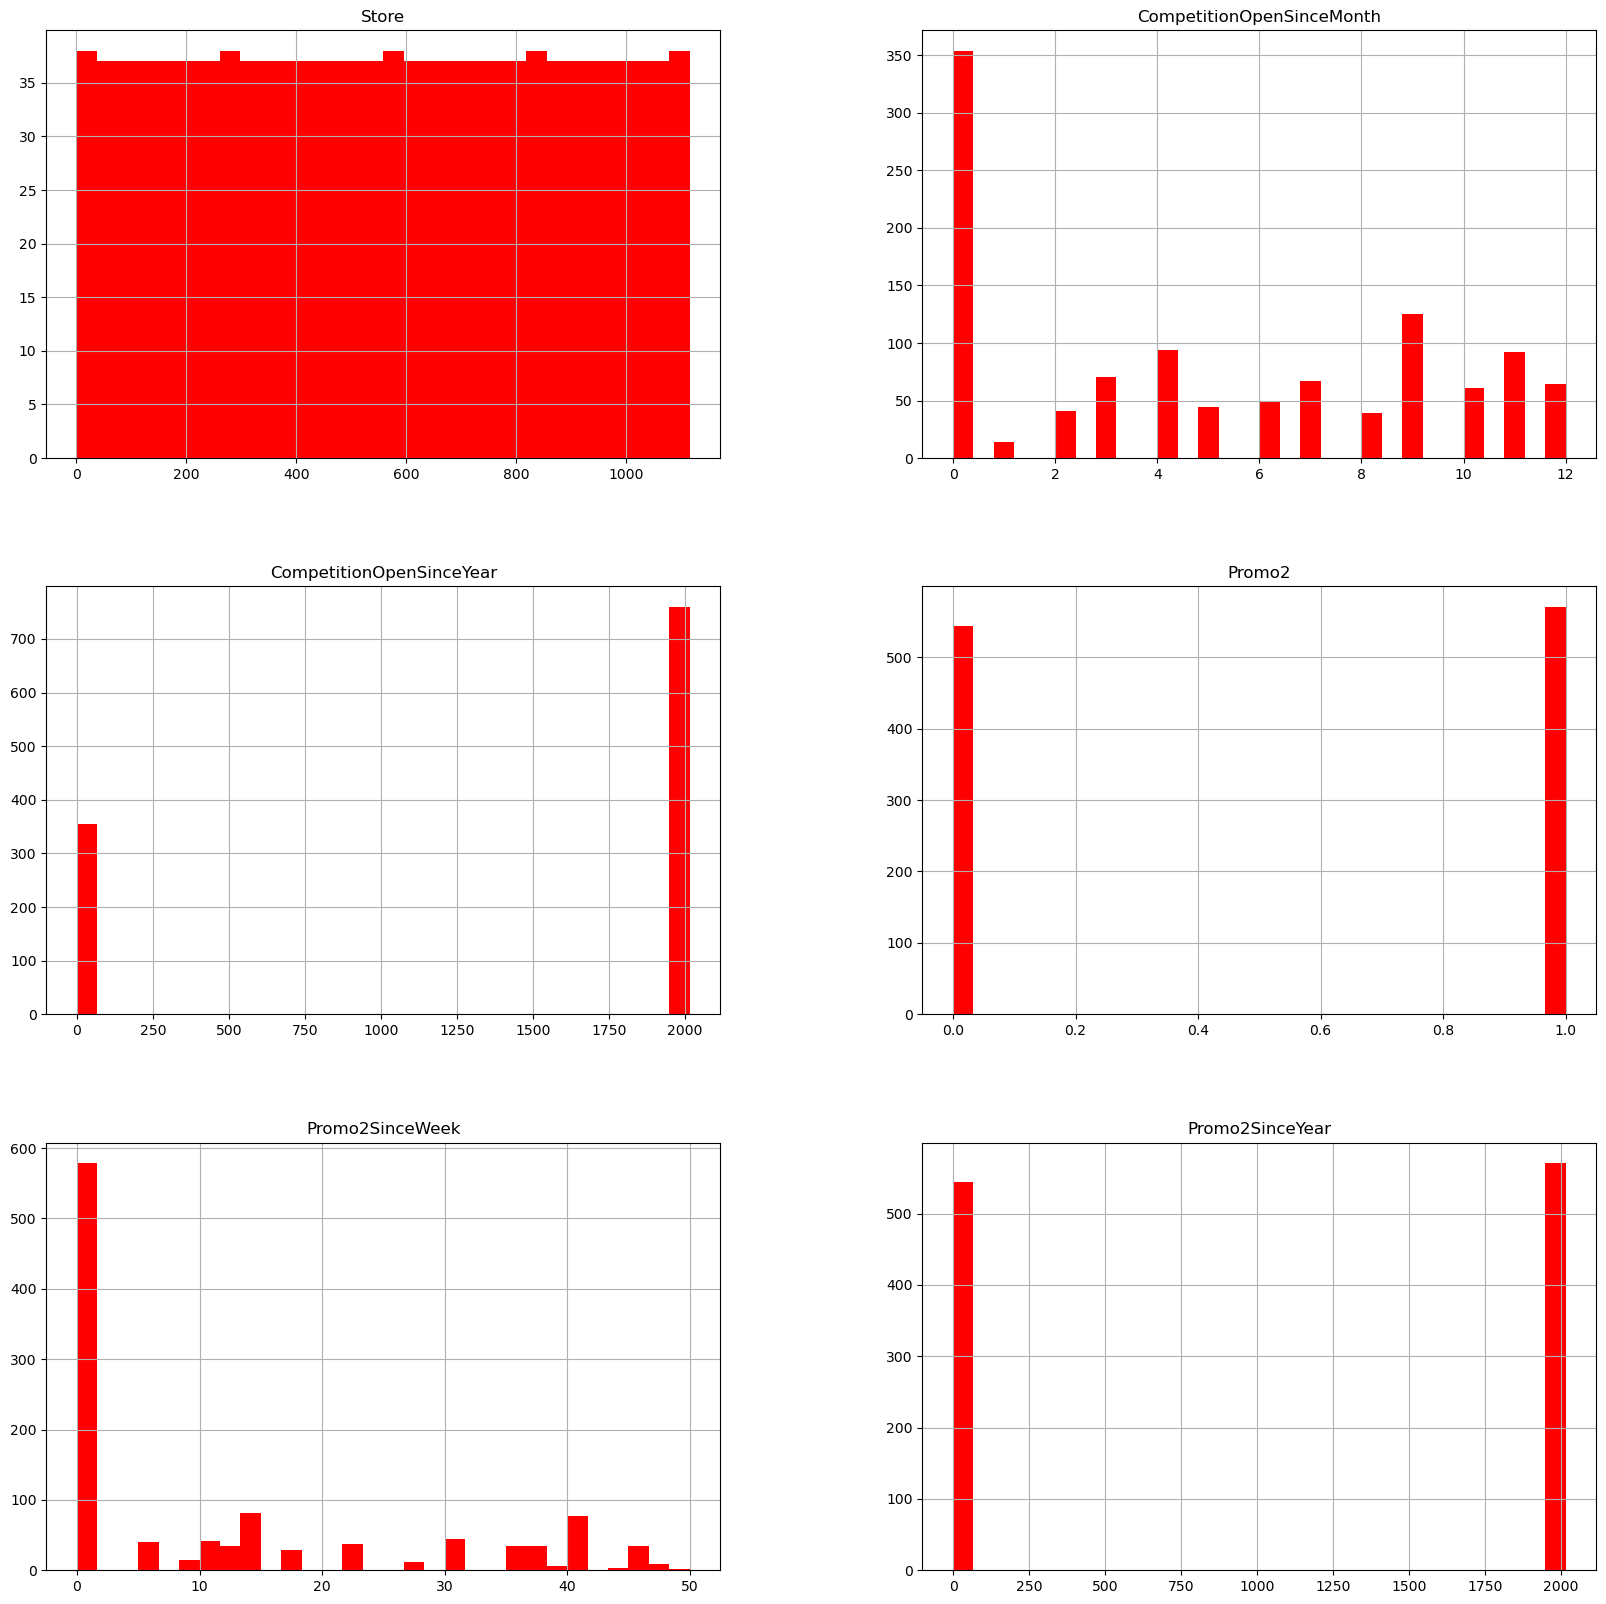

In [19]:
# Observaremos los histogramas de cada variable para decidir si eliminar alguna de ellas...
tiendas.hist(bins = 30, figsize = (20, 20), color ='r')

## 3.3 EXPLORAR DATASET COMBINADO.

### 3.3.1 Combinar ambos datasets con un inner y la columna 'Store'.

In [20]:
ventas_tiendas = pd.merge(ventas, tiendas, how='inner', on='Store') # (df1, df2, inter o union, columna Foreing Key)

In [21]:
# revisar
ventas_tiendas

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


### 3.3.2 Guardar en  Csv (por si acaso)

In [22]:
ventas_tiendas.to_csv('test.csv', index=False)

### 3.3.3 Correlación de las variables con la variable 'Sales'.

In [23]:
correlations = ventas_tiendas.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

### Conclusiones.
##### 1.- Los días de la semana, el momento del año en el que se realiza la promoción y la promo 2, están negativamente relacionadas con las ventas.
##### 2.- Los clientes y la promoción se correlacionan positivamente con las ventas.

### 3.3.4 Matriz de correlaciones.

<AxesSubplot: >

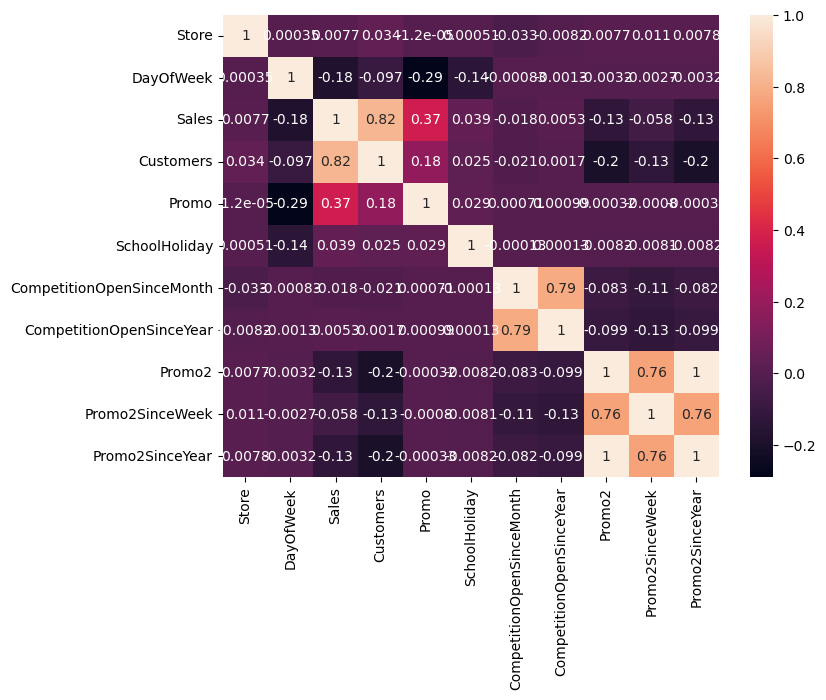

In [24]:
correlations = ventas_tiendas.corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(correlations, annot=True)

### Conclusiones.
##### 1.- Claramente, los clientes se relacionan con las ventas.
##### 2.- Hay una leve relación entre las promos y las ventas.
##### 3.- El año de apertura de la competencia se relaciona con el mes de la apertura de la competencia, lógico.
##### 4.- La semana de la promoción 2 se relaciona con la promo 2, lógico.
##### 5.- El año de la promoción 2 se relaciona con la promo 2 y con la semana de la promo 2, lógico.


## 3.4 Análisis temporal.

### 3.4.1 Separar fecha en columnas.

In [25]:
# partimos con el año
ventas_tiendas['Year'] = pd.DatetimeIndex(ventas_tiendas['Date']).year

In [26]:
# Revisamos.
ventas_tiendas.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015


In [27]:
# Hacemos lo mismo para el mes.
ventas_tiendas['Month'] = pd.DatetimeIndex(ventas_tiendas['Date']).month
ventas_tiendas.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


In [28]:
# Para el día.
ventas_tiendas['Day'] = pd.DatetimeIndex(ventas_tiendas['Date']).day
ventas_tiendas.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


In [29]:
# Y la semana.
ventas_tiendas['Week'] = pd.DatetimeIndex(ventas_tiendas['Date']).week
ventas_tiendas.head()

C:\Users\Danko\AppData\Local\Temp\ipykernel_13156\324436906.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  ventas_tiendas['Week'] = pd.DatetimeIndex(ventas_tiendas['Date']).week


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Week
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30,31
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29,31
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28,31
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27,31


### 3.4.2 Graficar ventas y clientes temporalmente.

### Ventas y clientes promedio por mes.

Text(0.5, 1.0, 'Clientes promedio por Mes')

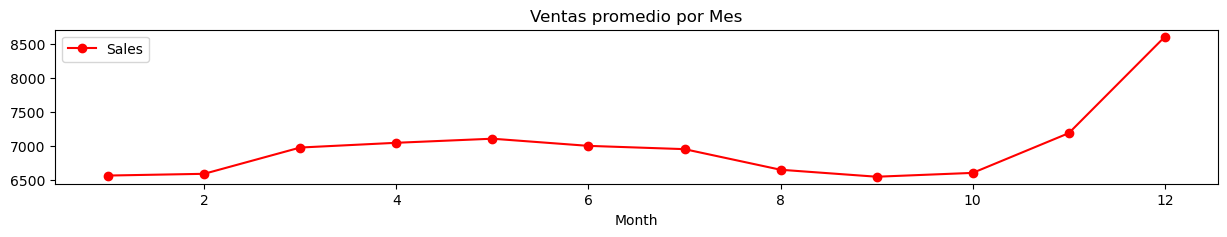

<Figure size 640x480 with 0 Axes>

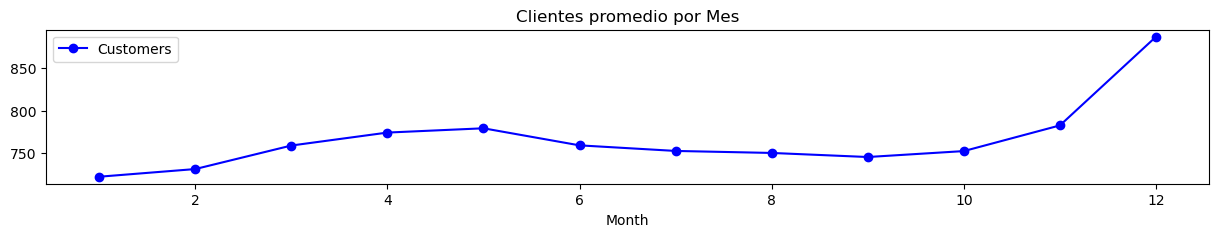

In [30]:
# 'groupby' funciona muy bien al agrupar todos los datos que comparten la misma columna del mes, luego obtener la media de la columna de ventas
axis = ventas_tiendas.groupby('Month')[['Sales']].mean().plot(figsize=(15,2), marker='o', color='r')
axis.set_title('Ventas promedio por Mes')
plt.figure()
axis = ventas_tiendas.groupby('Month')[['Customers']].mean().plot(figsize=(15,2), marker='o', color='b')
axis.set_title('Clientes promedio por Mes')

### Ventas y clientes promedio por día.

Text(0.5, 1.0, 'Clientes promedio por Día')

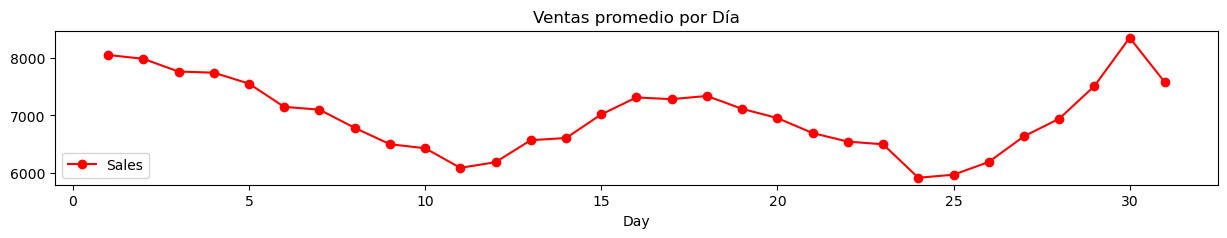

<Figure size 640x480 with 0 Axes>

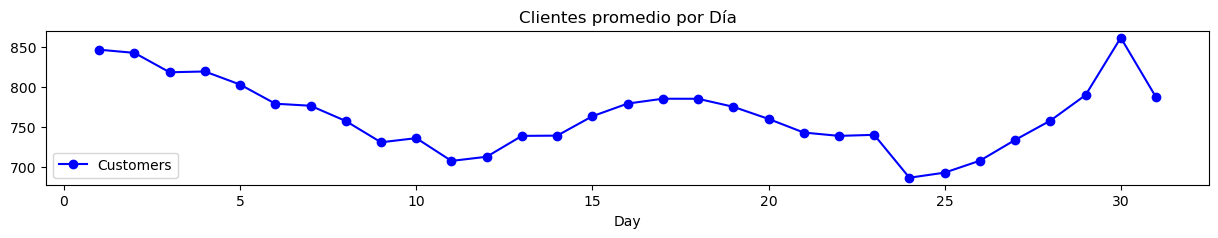

In [31]:
axis = ventas_tiendas.groupby('Day')[['Sales']].mean().plot(figsize=(15,2), marker='o', color='r')
axis.set_title('Ventas promedio por Día')
plt.figure()
axis = ventas_tiendas.groupby('Day')[['Customers']].mean().plot(figsize=(15,2), marker='o', color='b')
axis.set_title('Clientes promedio por Día')

### Ventas y clientes promedio por año.

Text(0.5, 1.0, 'Clientes promedio por Año')

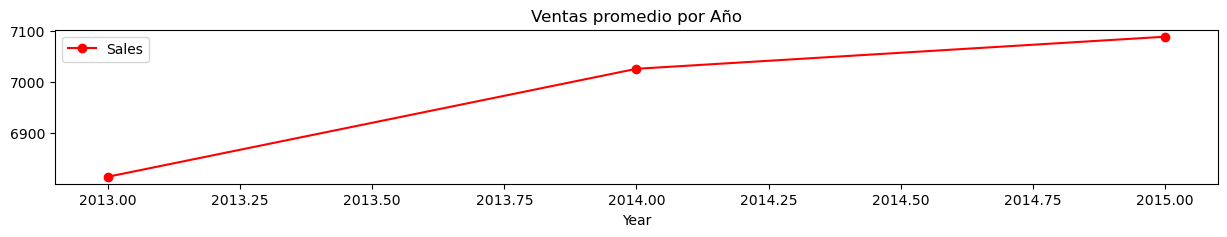

<Figure size 640x480 with 0 Axes>

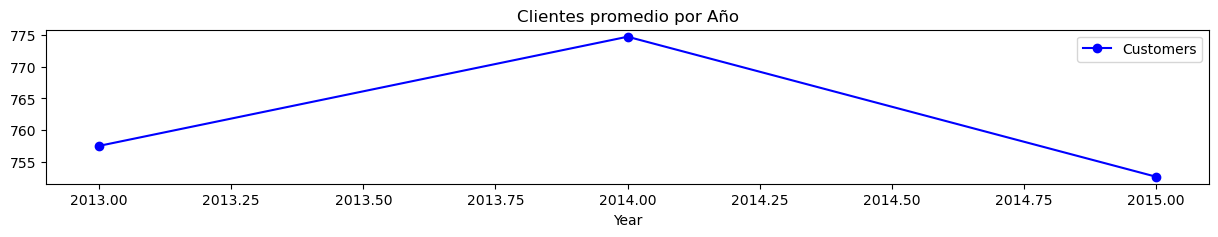

In [32]:
axis = ventas_tiendas.groupby('Year')[['Sales']].mean().plot(figsize=(15,2), marker='o', color='r')
axis.set_title('Ventas promedio por Año')
plt.figure()
axis = ventas_tiendas.groupby('Year')[['Customers']].mean().plot(figsize=(15,2), marker='o', color='b')
axis.set_title('Clientes promedio por Año')

### Ventas y clientes promedio por Día de la Semana (L,M,M, etc).

Text(0.5, 1.0, 'Clientes promedio por Día de la Semana')

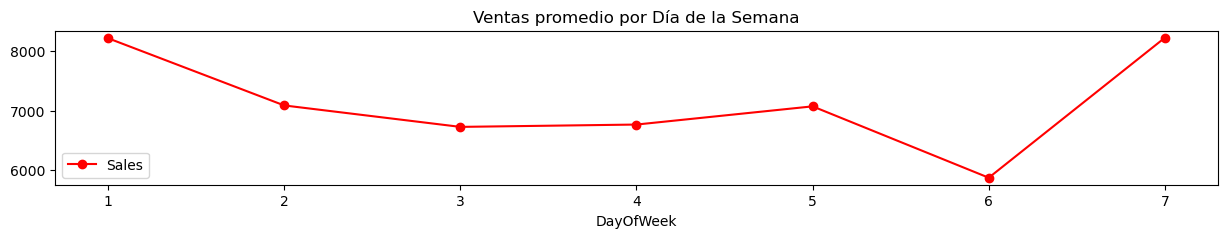

<Figure size 640x480 with 0 Axes>

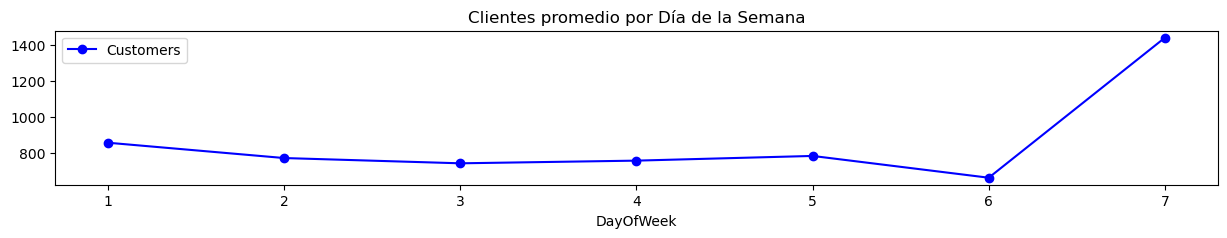

In [33]:
axis = ventas_tiendas.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(15,2), marker='o', color='r')
axis.set_title('Ventas promedio por Día de la Semana')
plt.figure()
axis = ventas_tiendas.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(15,2), marker='o', color='b')
axis.set_title('Clientes promedio por Día de la Semana')

### Ventas y clientes promedio por Tipo de Tienda y por Semana.

Text(0.5, 1.0, 'Clientes promedio por Tipo de Tienda y Semana')

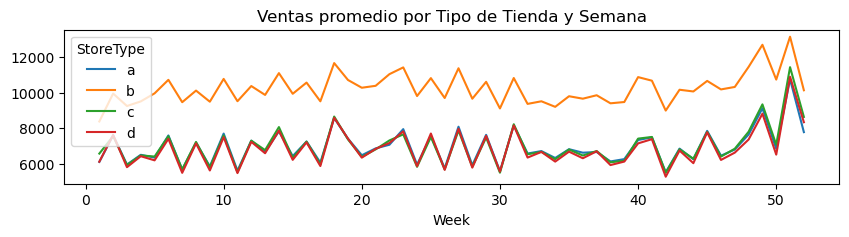

<Figure size 640x480 with 0 Axes>

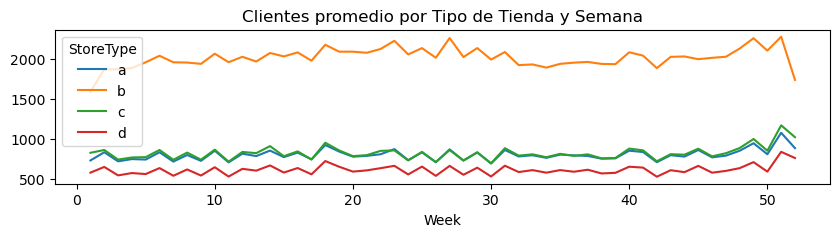

In [34]:
fig, ax = plt.subplots(figsize=(10,2))
ventas_tiendas.groupby(['Week','StoreType']).mean()['Sales'].unstack().plot(ax=ax)
ax.set_title('Ventas promedio por Tipo de Tienda y Semana')
plt.figure()
fig, ax = plt.subplots(figsize=(10,2))
ventas_tiendas.groupby(['Week','StoreType']).mean()['Customers'].unstack().plot(ax=ax)
ax.set_title('Clientes promedio por Tipo de Tienda y Semana')

### Ventas y clientes promedio por Tipo de Tienda y por Fecha.

Text(0.5, 1.0, 'Clientes promedio por Tipo de Tienda y Fecha')

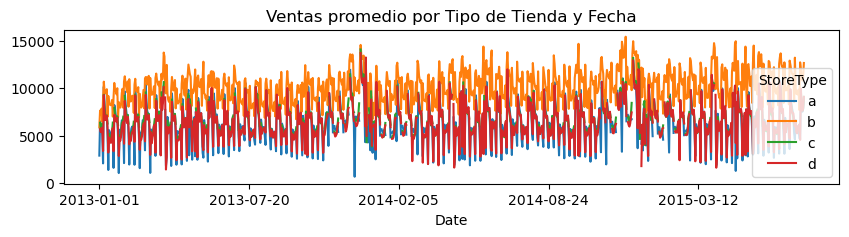

<Figure size 640x480 with 0 Axes>

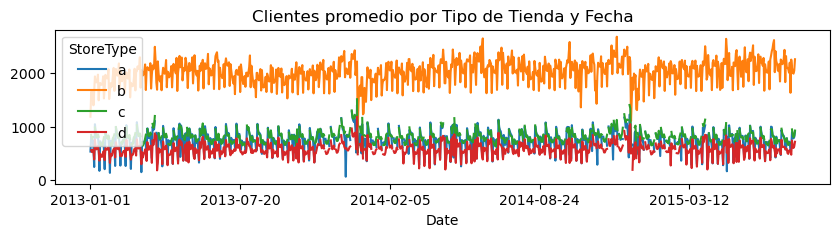

In [35]:
fig, ax = plt.subplots(figsize=(10,2))
ventas_tiendas.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax)
ax.set_title('Ventas promedio por Tipo de Tienda y Fecha')
plt.figure()
fig, ax = plt.subplots(figsize=(10,2))
ventas_tiendas.groupby(['Date','StoreType']).mean()['Customers'].unstack().plot(ax=ax)
ax.set_title('Clientes promedio por Tipo de Tienda y Fecha')

### Ventas y clientes promedio por Promo.

<AxesSubplot: xlabel='Promo', ylabel='Customers'>

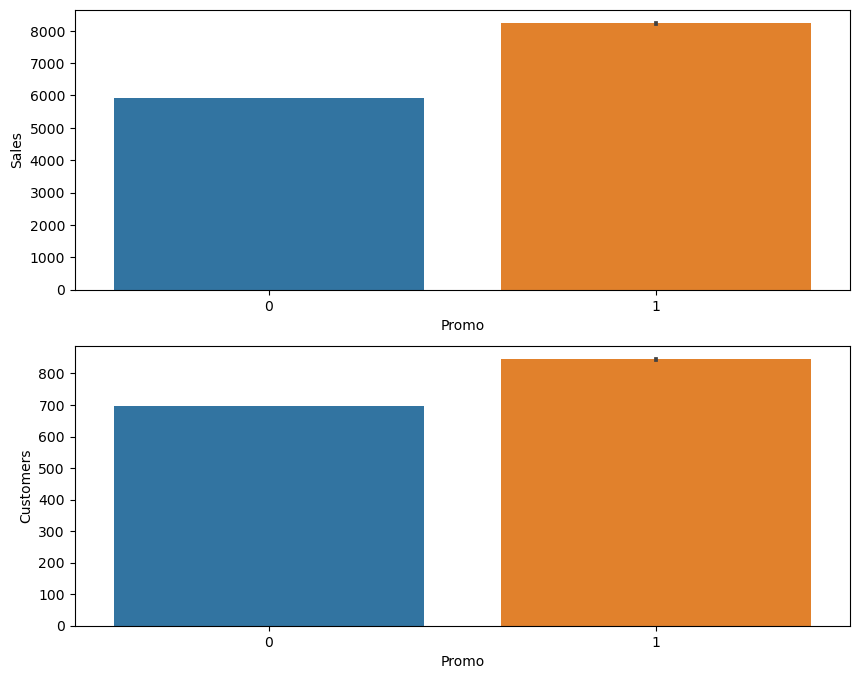

In [36]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.barplot(x='Promo', y='Sales', data=ventas_tiendas)

plt.subplot(212)
sns.barplot(x='Promo', y='Customers', data=ventas_tiendas)

<AxesSubplot: xlabel='Promo2', ylabel='Customers'>

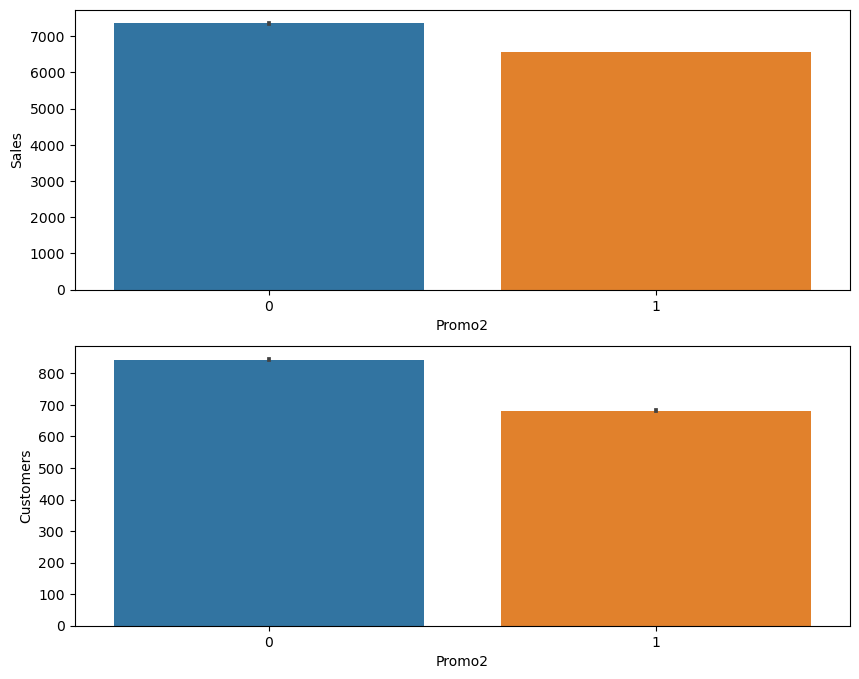

In [37]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.barplot(x='Promo2', y='Sales', data=ventas_tiendas)

plt.subplot(212)
sns.barplot(x='Promo2', y='Customers', data=ventas_tiendas)

### Ventas y clientes promedio por Promo vista distribución.

<AxesSubplot: xlabel='Promo', ylabel='Customers'>

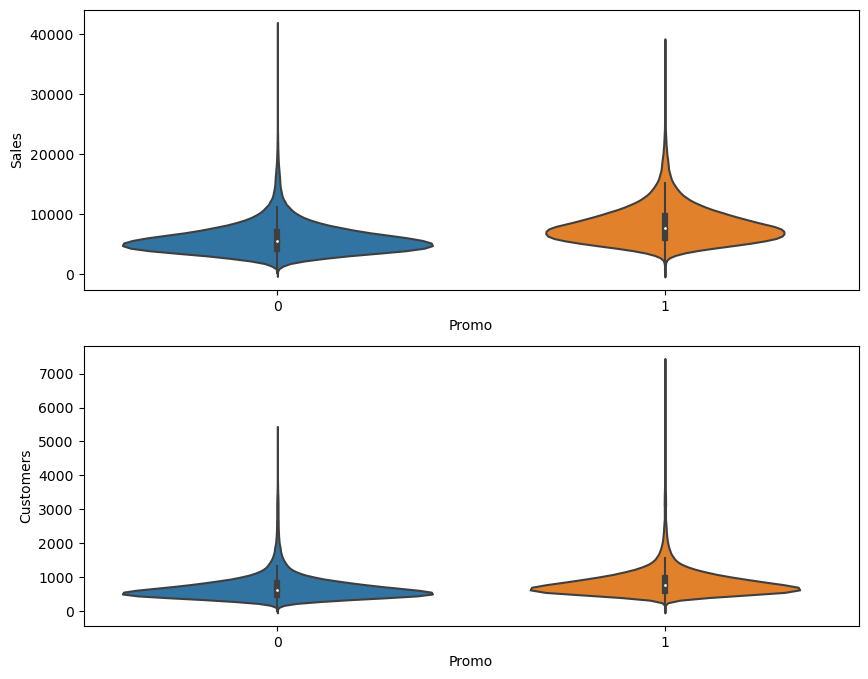

In [38]:
plt.figure(figsize=(10,8))

plt.subplot(211)
sns.violinplot(x='Promo', y='Sales', data=ventas_tiendas)

plt.subplot(212)
sns.violinplot(x='Promo', y='Customers', data=ventas_tiendas)

<AxesSubplot: xlabel='Promo2', ylabel='Customers'>

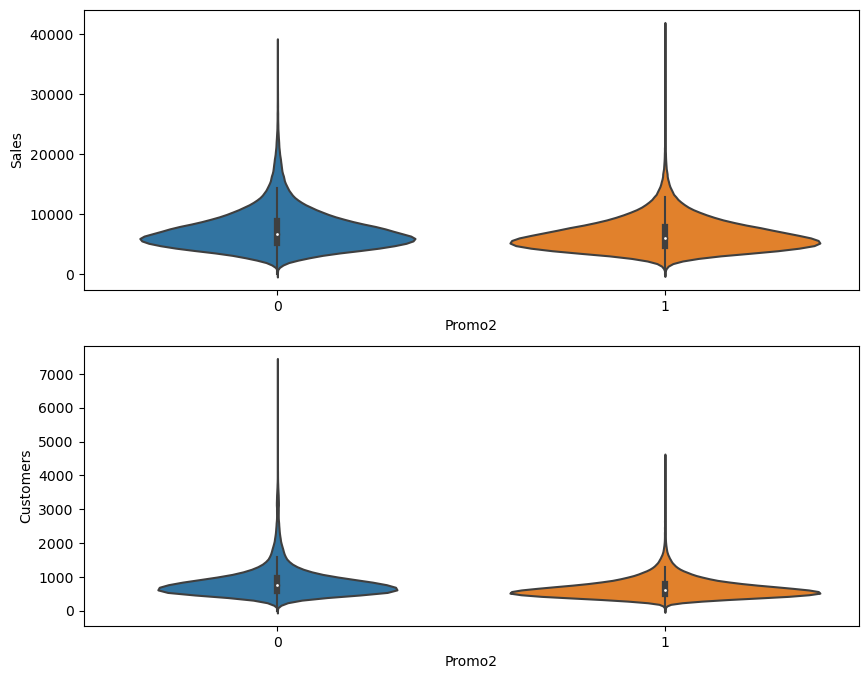

In [39]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.violinplot(x='Promo2', y='Sales', data=ventas_tiendas)

plt.subplot(212)
sns.violinplot(x='Promo2', y='Customers', data=ventas_tiendas)

# 4. ENTENDER LA INTUICIÓN DETRÁS DE FACEBOOK PROPHET.

![alt text](https://drive.google.com/uc?id=1zk5cwXQvqci6hOwXoTSU0DY0Dpt1jNF0)

![alt text](https://drive.google.com/uc?id=10HNgyFmM1CG6yzSxpFudunUaHKNV_xBT)

![alt text](https://drive.google.com/uc?id=1BhEzmHYh_HKDWGz4eXP-clF7KAxJ_Od7)

# 5. ENTRENAR EL MODELO, PRIMERA PARTE.

## 5.1 Instalar e importar Prophet.

In [44]:
!pip install prophet

     ---------------------------------------- 12.1/12.1 MB 2.9 MB/s eta 0:00:00
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
     ---------------------------------------- 81.2/81.2 kB 4.4 MB/s eta 0:00:00
  Using cached holidays-0.18-py3-none-any.whl (195 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached hijri_converter-2.2.4-py3-none-any.whl (14 kB)


In [46]:
from prophet import Prophet

## 5.2 Preparar la estructura de las columnas para Facebook Prophet

#### Facebook Prophet funciona solo con la variable ds (predictora) e y (predicción). Por lo que hay que hacer cambios a la estructura del dataframe. Es una exigencia que tiene el algoritmo y siempre debe ser así. Por lo tanto, para que toda la lógica quepa en un mismo sitio, crearemos una función.

In [47]:
def sales_predictions(Store_ID, sales_df, periods): # tienda a predecir,dataset y periodo en días 
    sales_df= sales_df[sales_df['Store'] == Store_ID] # filtrar del dataset original, sólo el Store_ID del parámetro
    sales_df= sales_df[['Date','Sales']].rename(columns= {'Date': 'ds', 'Sales':'y'}) # renombrar según exigencia de Prophet
    sales_df = sales_df.sort_values('ds') # ordena ascendentemente mediante el campo de las fechas 'ds'
    return sales_df

In [48]:
# revisar.
df = sales_predictions(10, ventas_tiendas, 60)
df

,ds,y
7819,2013-01-02,4812
7818,2013-01-03,4675
7817,2013-01-04,5114
7816,2013-01-05,4256
7815,2013-01-07,7804
...,...,...
7040,2015-07-27,7212
7039,2015-07-28,6140
7038,2015-07-29,5524
7037,2015-07-30,6186


#### Luego de definir en la función nuestro dataset con las variables ds e y, continuaremos creando el modelo.

In [49]:
def sales_predictions(Store_ID, sales_df, periods):
    sales_df= sales_df[sales_df['Store'] == Store_ID]
    sales_df= sales_df[['Date','Sales']].rename(columns= {'Date': 'ds', 'Sales':'y'})
    sales_df = sales_df.sort_values('ds')
    
    model  = Prophet() # importar el modelo
    model.fit(sales_df) # ajuste con ds e y
    future = model.make_future_dataframe(periods = periods) # modelo que hará la predicción a futuro
                                                            # con la cantidad de días después del último día
                                                            # estas son las nuevas variables predictoras (eje x)
    forecast = model.predict(future) # pronóstico donde el modelo realiza la predicción de 'future' (eje y)

    # graficar la predicción
    figure = model.plot(forecast, xlabel='Fecha', ylabel='Ventas') # puntos reales del dataset
    figure2 = model.plot_components(forecast) # banda de confianza donde se muestre la tendencia de ese pronóstico a futuro

03:21:49 - cmdstanpy - INFO - Chain [1] start processing
03:21:50 - cmdstanpy - INFO - Chain [1] done processing


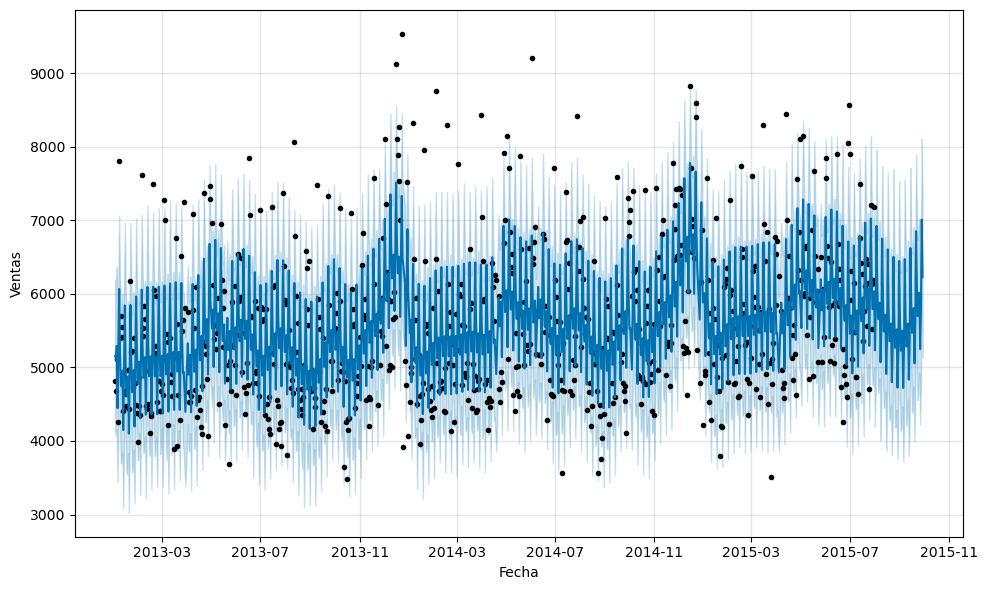

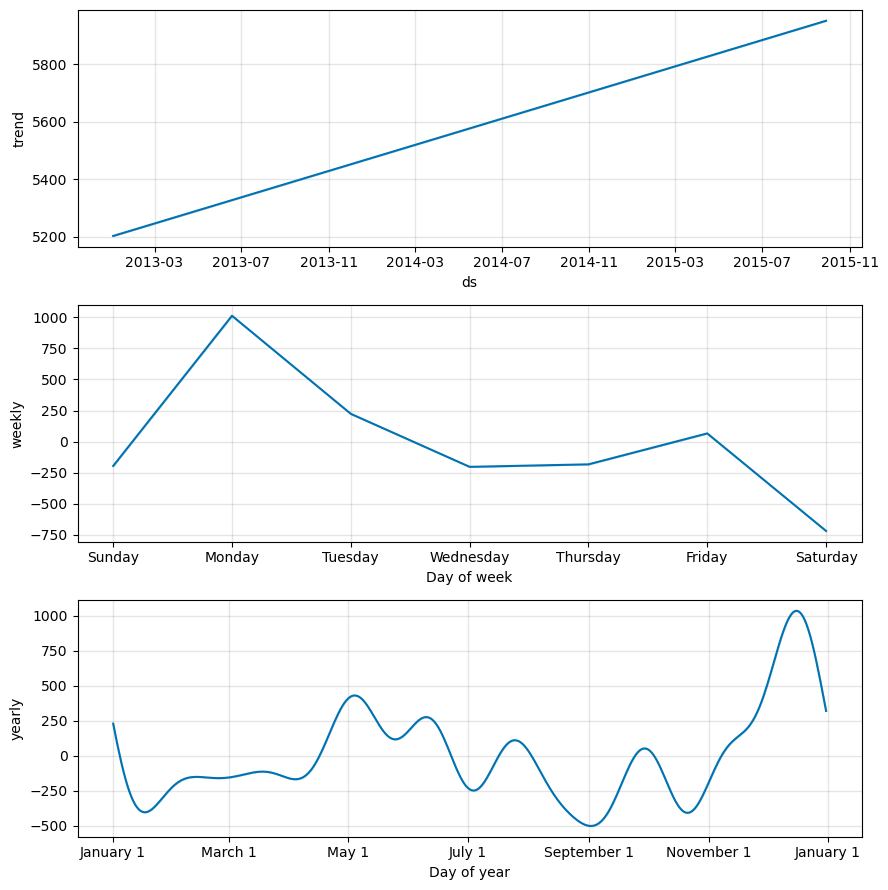

In [50]:
sales_predictions(10, ventas_tiendas, 60)

# 6. ENTRENAR AL MODELO, SEGUNDA PARTE.

- StateHoliday: indica si el día era festivo o no (a = vacaciones públicas, b = vacaciones de Pascua holiday, c = Navidades, 0 = No era festivo)
- SchoolHoliday: indica si (Store, Date) se ve afectado por el cierre de las escuelas públicas

## 6.1 Agregamos la información relativa a las vacaciones.

In [62]:
def sales_predictions(Store_ID, sales_df, holidays, periods): # agregamos el parámetro de holidays
    sales_df= sales_df[sales_df['Store'] == Store_ID]
    sales_df= sales_df[['Date','Sales']].rename(columns= {'Date': 'ds', 'Sales':'y'})
    sales_df = sales_df.sort_values('ds')
    
    model  = Prophet(holidays=holidays) # aquí también agregamos el parámetro
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)

    figure = model.plot(forecast, xlabel='Fecha', ylabel='Ventas')
    figure2 = model.plot_components(forecast)

## 6.2 Obtener todas las fechas relacionadas con las vacaciones escolares.

In [51]:
school_holidays = ventas_tiendas[ventas_tiendas['SchoolHoliday'] == 1].loc[:,'Date'].values
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [52]:
school_holidays.shape

(163457,)

In [53]:
# dejamos las fechas repetidas
school_holidays = np.unique(school_holidays)
school_holidays.shape

(477,)

## 6.3 Obtener todas las fechas correspondientes a los festivos estatales.

In [55]:
state_holidays = ventas_tiendas[(ventas_tiendas['StateHoliday'] == 'a') | (ventas_tiendas['StateHoliday'] == 'b') | (ventas_tiendas['StateHoliday'] == 'c')].loc[:,'Date'].values
state_holidays.shape

(910,)

In [56]:
state_holidays

array(['2014-10-03', '2013-10-03', '2015-06-04', '2014-06-19',
       '2013-05-30', '2015-06-04', '2014-06-19', '2013-05-30',
       '2014-10-03', '2013-10-03', '2015-05-01', '2014-10-31',
       '2014-05-01', '2013-10-03', '2013-05-01', '2015-06-04',
       '2014-06-19', '2013-05-30', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2013-08-15', '2015-05-25',
       '2015-05-14', '2015-05-01', '2015-04-06', '2015-04-03',
       '2015-01-01', '2014-12-26', '2014-12-25', '2014-10-03',
       '2014-06-09', '2014-05-29', '2014-05-01', '2014-04-21',
       '2014-04-18', '2014-01-01', '2013-12-26', '2013-12-25',
       '2013-10-03', '2013-05-20', '2013-05-09', '2013-05-01',
       '2013-04-01', '2013-03-29', '2013-01-01', '2014-10-03',
       '2015-06-04', '2014-06-19', '2013-05-30', '2015-06-04',
       '2014-06-19', '2013-05-30', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-10-03', '2014-10-03', '2013-

In [57]:
# dejamos las fechas repetidas
state_holidays = np.unique(state_holidays)
state_holidays.shape

(35,)

## 6.4 Formar dos dataframes y unirlos para suministrarlos a FBprophet.

In [58]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays), 'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2013-01-01,school_holiday
1,2013-01-02,school_holiday
2,2013-01-03,school_holiday
3,2013-01-04,school_holiday
4,2013-01-05,school_holiday
...,...,...
472,2015-07-27,school_holiday
473,2015-07-28,school_holiday
474,2015-07-29,school_holiday
475,2015-07-30,school_holiday


In [59]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays), 'holiday': 'state_holiday'})
state_holidays

,ds,holiday
0,2013-01-01,state_holiday
1,2013-01-06,state_holiday
2,2013-03-29,state_holiday
3,2013-04-01,state_holiday
4,2013-05-01,state_holiday
5,2013-05-09,state_holiday
6,2013-05-20,state_holiday
7,2013-05-30,state_holiday
8,2013-08-15,state_holiday
9,2013-10-03,state_holiday


In [60]:
# Concatenamos las vacaciones escolares y los festivos estatales
school_state_holidays = pd.concat((state_holidays, school_holidays), axis=0)
school_state_holidays

,ds,holiday
0,2013-01-01,state_holiday
1,2013-01-06,state_holiday
2,2013-03-29,state_holiday
3,2013-04-01,state_holiday
4,2013-05-01,state_holiday
...,...,...
472,2015-07-27,school_holiday
473,2015-07-28,school_holiday
474,2015-07-29,school_holiday
475,2015-07-30,school_holiday


# 7. REALIZAR LA PREDICCIÓN.

04:06:51 - cmdstanpy - INFO - Chain [1] start processing
04:06:51 - cmdstanpy - INFO - Chain [1] done processing


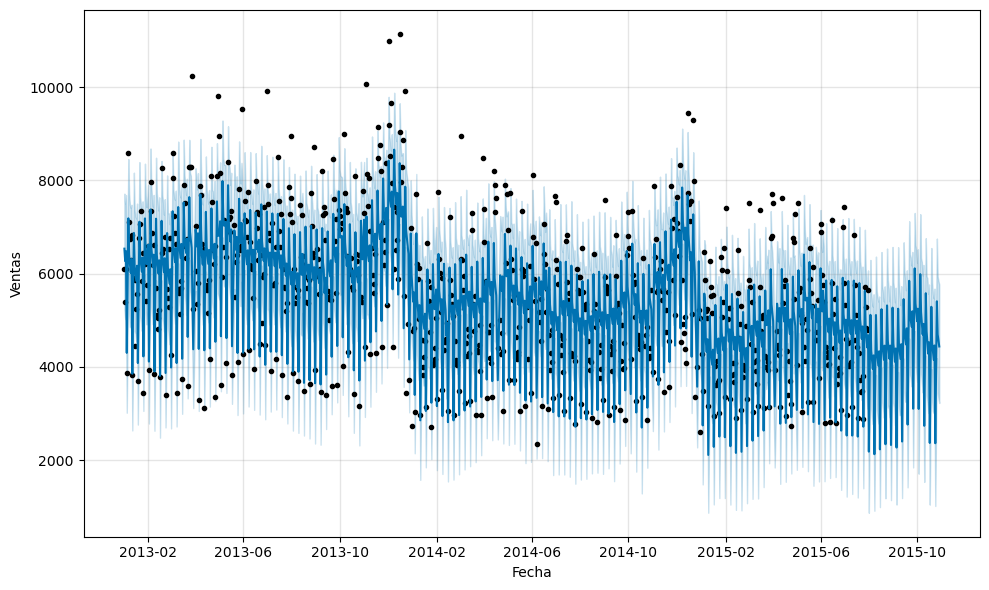

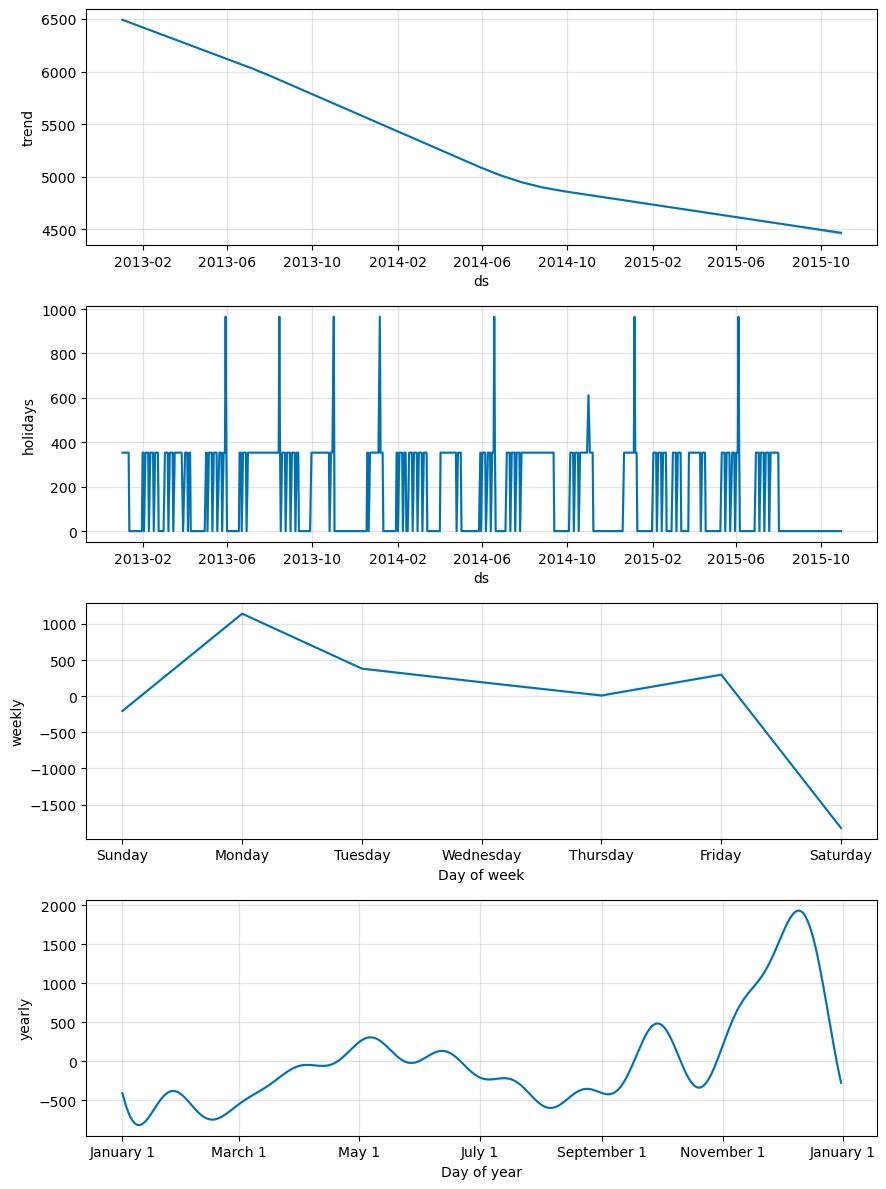

In [63]:
sales_predictions(6, ventas_tiendas, school_state_holidays, 90)

# BUEN TRABAJO!!!